In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import prettytable
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.metrics import f1_score
from scipy.stats import randint as sp_randint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV

In [2]:
#read the data into a dataframe
df_final_train = pd.read_hdf('data/storage_sample_stage5.h5', 'train_df',mode='r')
df_final_test = pd.read_hdf('data/storage_sample_stage5.h5', 'test_df',mode='r')

y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

df_final_train.columns

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'num_followers_s', 'num_followers_d',
       'num_followees_s', 'num_followees_d', 'inter_followers',
       'inter_followees', 'adar_index', 'follows_back', 'same_comp',
       'shortest_path', 'weight_in', 'weight_out', 'weight_f1', 'weight_f2',
       'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d', 'katz_s',
       'katz_d', 'hubs_s', 'hubs_d', 'authorities_s', 'authorities_d',
       'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4', 'svd_u_s_5',
       'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3', 'svd_u_d_4',
       'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2', 'svd_v_s_3',
       'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1', 'svd_v_d_2',
       'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'preferential_followers', 'preferential_followee', 'svd_dot_u',
       'svd_dot_v'],
      dtype='

In [3]:
#remove the unwanted columns
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

In [9]:
param_dist = {"n_estimators":sp_randint(105,125),"max_depth": sp_randint(10,15)}

estimator1 = xgb.XGBRFClassifier(objective= 'binary:logistic',eval_metric= 'auc',scale_pos_weight = 1,random_state=123)

Rsearch1= RandomizedSearchCV(estimator1,param_distributions=param_dist,scoring='f1',n_jobs=-1, cv=10,verbose=20,random_state=123)

Rsearch1.fit(df_final_train,y_train)

Rsearch1.best_params_, Rsearch1.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


({'max_depth': 14, 'n_estimators': 105}, 0.9994502428639844)

In [15]:
print('mean test scores',Rsearch1.cv_results_['mean_test_score'])

mean test scores [0.99942024 0.99928024 0.99940026 0.99907017 0.99929024 0.99905016
 0.99928024 0.99945024 0.99907019 0.99928024]


In [11]:
print(Rsearch1.best_estimator_)
print(Rsearch1.best_params_)
print(Rsearch1.best_score_)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=1,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=14,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=105, n_jobs=0,
                num_parallel_tree=105, objective='binary:logistic',
                predictor='auto', random_state=123, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)
{'max_depth': 14, 'n_estimators': 105}
0.9994502428639844


In [13]:
d=Rsearch1.best_params_['max_depth']
n=Rsearch1.best_params_['n_estimators']

In [14]:
params={"colsample_bytree": [ 0.3, 0.4, 0.5 , 0.7 ,0.9],'subsample':[0.75,0.80,0.85,0.90]}
estimator2 =xgb.XGBRFClassifier(objective= 'binary:logistic',eval_metric= 'auc',scale_pos_weight = 1,random_state=123,max_depth=d,n_estimators=n)

Rsearch2= RandomizedSearchCV(estimator2,param_distributions=params,scoring='f1',n_jobs=8, cv=10,verbose=20,random_state=123)

Rsearch2.fit(df_final_train,y_train)

Rsearch2.best_params_, Rsearch2.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


({'subsample': 0.85, 'colsample_bytree': 0.7}, 0.9998800599670196)

In [18]:
print('mean test scores',Rsearch2.cv_results_['mean_test_score'])
#print('mean train scores',Rsearch2.cv_results_['mean_train_score'])

mean test scores [0.99988006 0.99427445 0.99416653 0.99964017 0.99678214 0.99433421
 0.99965015 0.99986006 0.98889135 0.99986007]


In [19]:
print(Rsearch2.best_estimator_)
print(Rsearch2.best_params_)
print(Rsearch2.best_score_)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=0.7,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric='auc', gamma=0, gpu_id=-1, grow_policy='depthwise',
                importance_type=None, interaction_constraints='', max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=14,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=105, n_jobs=0,
                num_parallel_tree=105, objective='binary:logistic',
                predictor='auto', random_state=123, reg_alpha=0,
                sampling_method='uniform', scale_pos_weight=1, ...)
{'subsample': 0.85, 'colsample_bytree': 0.7}
0.9998800599670196


In [20]:
col=Rsearch2.best_params_["colsample_bytree"]
sub=Rsearch2.best_params_['subsample']

In [21]:
params={"learning_rate": [0.05,0.10,0.15,0.20,0.25,0.30,0.5] ,"gamma": [ 0.01,0.0, 0.1, 0.2 , 0.3, 0.4 ]}

estimator3 = xgb.XGBRFClassifier(objective= 'binary:logistic',eval_metric= 'auc',scale_pos_weight = 1,random_state=123,max_depth=d,n_estimators=n,colsample_bytree=col,subsample=sub)
Rsearch3= RandomizedSearchCV(estimator3,param_distributions=params,scoring='f1',n_jobs=8, cv=10,random_state=123,verbose=20)
Rsearch3.fit(df_final_train,y_train)
Rsearch3.best_params_, Rsearch3.best_score_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


({'learning_rate': 0.5, 'gamma': 0.2}, 0.9998800599670196)

In [22]:
print('mean test scores',Rsearch3.cv_results_['mean_test_score'])
#print('mean train scores',Rsearch3.cv_results_['mean_train_score'])

mean test scores [0.99988006 0.99988006 0.99988006 0.99988006 0.99988006 0.99988006
 0.99988006 0.99988006 0.99988006 0.99988006]


In [23]:
print(Rsearch3.best_estimator_)
print(Rsearch3.best_params_)
print(Rsearch3.best_score_)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=0.7,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric='auc', gamma=0.2, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', learning_rate=0.5, max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=14,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=105, n_jobs=0,
                num_parallel_tree=105, objective='binary:logistic',
                predictor='auto', random_state=123, reg_alpha=0,
                sampling_method='uniform', ...)
{'learning_rate': 0.5, 'gamma': 0.2}
0.9998800599670196


In [24]:
rate = Rsearch3.best_params_["learning_rate"]
g = Rsearch3.best_params_['gamma']

In [ ]:
params={'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}
estimator4 = xgb.XGBRFClassifier(objective= 'binary:logistic',eval_metric= 'auc',scale_pos_weight = 1,random_state=123,max_depth=d,n_estimators=n,colsample_bytree=col,subsample=sub,learning_rate=rate,gamma=g)
Rsearch4= RandomizedSearchCV(estimator4,param_distributions=params,scoring='f1',n_jobs=8, cv=10,random_state=123,verbose=20)
Rsearch4.fit(df_final_train,y_train)
Rsearch4.best_params_, Rsearch4.best_score_

In [30]:
print('mean test scores',Rsearch4.cv_results_['mean_test_score'])
#print('mean train scores',Rsearch4.cv_results_['mean_train_score'])

mean test scores [0.99988006 0.99988006 0.99988006 0.99988006 0.99989005]


In [31]:
print(Rsearch4.best_estimator_)
print(Rsearch4.best_params_)
print(Rsearch4.best_score_)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=0.7,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric='auc', gamma=0.2, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', learning_rate=0.5, max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=14,
                max_leaves=0, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=105, n_jobs=0,
                num_parallel_tree=105, objective='binary:logistic',
                predictor='auto', random_state=123, reg_alpha=0.05,
                sampling_method='uniform', ...)
{'reg_alpha': 0.05}
0.9998900549695182


In [33]:
alpha = Rsearch4.best_params_["reg_alpha"]
#lamda = Rsearch4.best_params_['reg_lamda']

In [37]:
final_clf = xgb.XGBRFClassifier(base_score=0.5, colsample_bylevel=1, colsample_bynode=0.8,
        colsample_bytree=0.7, eval_metric='auc', gamma=0.2,
        learning_rate=0.5, max_delta_step=0, max_depth=14,
        min_child_weight=1,missing=1, n_estimators=111, n_jobs=1, nthread=None,
        objective='binary:logistic', random_state=123, reg_alpha=0.001, scale_pos_weight=1, seed=None,
        silent=None, subsample=0.9, verbosity=1)

final_clf.fit(df_final_train,y_train)

XGBRFClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                colsample_bylevel=1, colsample_bytree=0.7,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric='auc', gamma=0.2, gpu_id=-1,
                grow_policy='depthwise', importance_type=None,
                interaction_constraints='', learning_rate=0.5, max_bin=256,
                max_cat_to_onehot=4, max_delta_step=0, max_depth=14,
                max_leaves=0, min_child_weight=1, missing=1,
                monotone_constraints='()', n_estimators=111, n_jobs=1,
                nthread=1, num_parallel_tree=111, objective='binary:logistic',
                predictor='auto', random_state=123, reg_alpha=0.001, ...)

In [38]:
predict_y_test_final = final_clf.predict(df_final_test)
predict_y_train_final = final_clf.predict(df_final_train)

print("The train f1 score is:",f1_score(y_train,predict_y_train_final))
print("The test f1 score is:",f1_score(y_test,predict_y_test_final))

The train f1 score is: 1.0
The test f1 score is: 0.8892053039067367


In [39]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


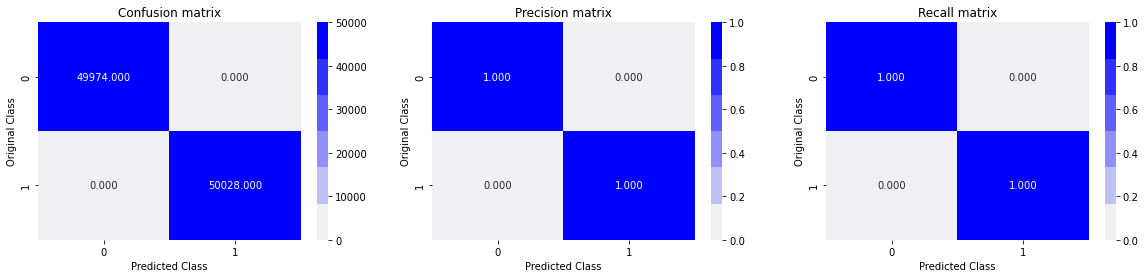

Test confusion_matrix


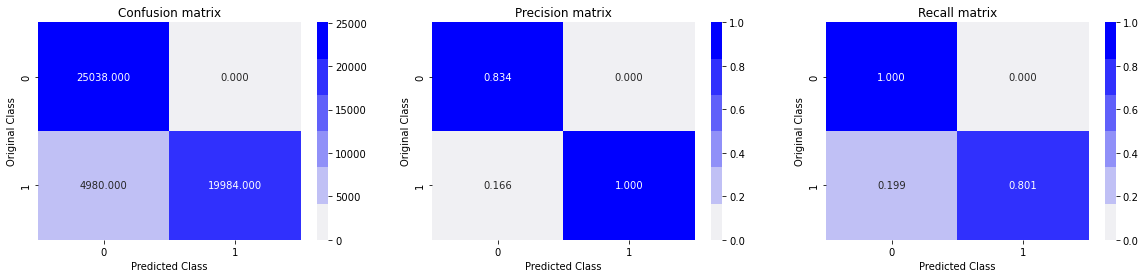

In [42]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,predict_y_train_final)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,predict_y_test_final)

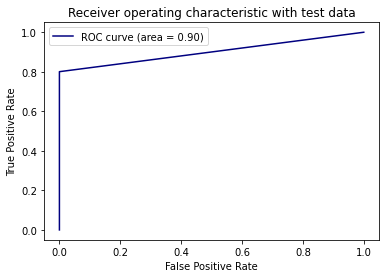

In [43]:
fpr,tpr,ths = roc_curve(y_test,predict_y_test_final)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

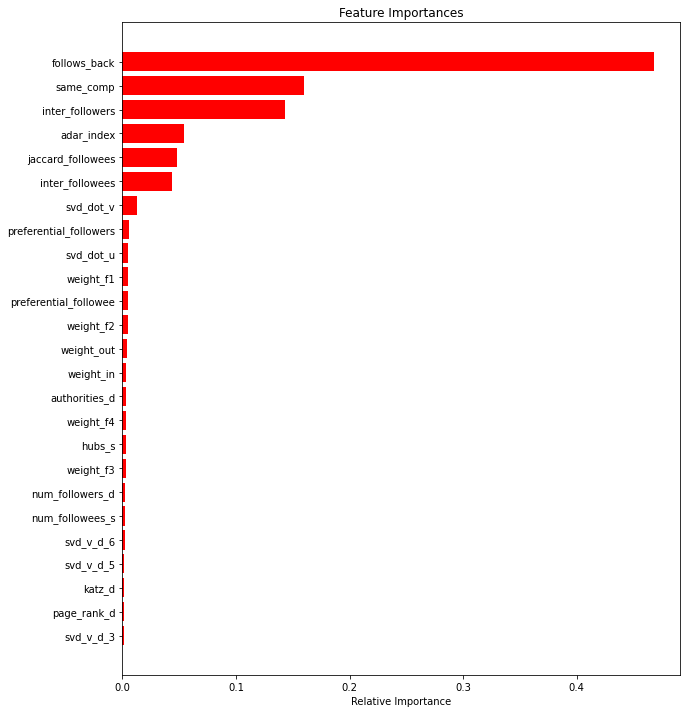

In [45]:
features = df_final_train.columns
importances = final_clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [50]:
tab = PrettyTable()
tab.field_names=["Model","Train_f1_Score","Test_f1_score"]
tab.add_row(["XGBoost","1.0","0.8892053039067367"])
print(tab)

+---------+----------------+--------------------+
|  Model  | Train_f1_Score |   Test_f1_score    |
+---------+----------------+--------------------+
| XGBoost |      1.0       | 0.8892053039067367 |
+---------+----------------+--------------------+


In [49]:
#save the model for next use
# save to JSON
final_clf.save_model("data/xgb_model.json")
# save to text format
final_clf.save_model("data/xgb_model.txt")

In [ ]:
final_clf = xgb.Booster()
final_clf.load_model("data/xgb_model.json")